In [47]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
file_id = '~/downloads/shooting_1982-2023_cleaned.csv'
gun_data = pd.read_csv(file_id)


In [7]:
len(gun_data)

141

In [8]:
gun_data.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,year,quarter,half,month_name,day_of_week,age_group,decade,name,current_age,description
0,Nashville religious school shooting,"Nashville, TN",2023-03-27,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,Unclear,...,2023,1,1,March,Monday,Early Adulthood,2020's,Audrey Hale,28,who was a former student at the private Coven...
1,Michigan State University shooting,"East Lansing, Michigan",2023-02-13,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,Unclear,...,2023,1,1,February,Monday,Middle Adulthood,2020's,Anthony D. McRae,43,opened fire at Berkey Hall and the MSU union
2,Half Moon Bay spree shooting,"Half Moon Bay, California",2023-01-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,Workplace,67,Unclear,...,2023,1,1,January,Monday,Old Age,2020's,Chunli Zhao,67,suspected of carrying out the attacks at a mu...
3,LA dance studio mass shooting,"Monterey Park, California",2023-01-21,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,Yes,...,2023,1,1,January,Saturday,Old Age,2020's,Huu Can Tran,72,fled the scene in a white van and later shot ...
4,Virginia Walmart shooting,"Chesapeake, Virginia",2022-11-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,Unclear,...,2022,4,2,November,Tuesday,Early Adulthood,2020's,Andre Bing,31,who worked as a supervisor at the store


Country Regulations: 	Restrictive, Permissive or None (NaN)
Estimate of Civilian Firearms: 	Civilian Firearms in Millions
Computation Method:	1 or 2 
Registered Firearms: 	# of Firearms Registered to Civilians
Unregistered Firearms: 	# of Unregistered Civilian Firearms 
Gun Death Rate:	Rate of Gun Deaths per Population
Deaths by Firearm: 	Deaths In Millions
Suicide by Firearm: 	Suicide In Millions
Unintentional Deaths by Firearms: 	Unintentional Deaths using Firearms Per 100k 
Police Killings: 	Deaths Using Firearms by Police
Rate Police Killings: 	Rate of Police Killings Per 10 M 
Data Year Police Killing: 	Year Data was Pulled


In [9]:
gun_data.count()

case                                141
location                            141
date                                141
summary                             141
fatalities                          141
injured                             141
total_victims                       141
location.1                          141
age_of_shooter                      141
prior_signs_mental_health_issues    141
mental_health_details               141
weapons_obtained_legally            141
where_obtained                      141
weapon_type                         141
weapon_details                      140
race                                141
gender                              141
latitude                            141
longitude                           141
type                                141
year                                141
quarter                             141
half                                141
month_name                          141
day_of_week                         141


In [11]:
print(gun_data.describe())

       fatalities     injured  total_victims  age_of_shooter    latitude  \
count  141.000000  141.000000     141.000000      141.000000  141.000000   
mean     7.808511   11.248227      19.049645       33.531915   37.400822   
std      7.463162   46.571935      51.737569       13.726696    5.441899   
min      3.000000    0.000000       3.000000        0.000000   21.320063   
25%      4.000000    1.000000       6.000000       22.000000   33.850116   
50%      6.000000    3.000000      10.000000       32.000000   38.135992   
75%      8.000000   10.000000      17.000000       43.000000   41.412323   
max     58.000000  546.000000     604.000000       72.000000   48.461367   

        longitude         year     quarter        half  
count  141.000000   141.000000  141.000000  141.000000  
mean   -96.205593  2010.382979    2.404255    1.460993  
std     17.642771    10.796600    1.140042    0.500253  
min   -157.876462  1982.000000    1.000000    1.000000  
25%   -117.043081  2005.000000

In [52]:
gun_data.age_group.describe()

count                 139
unique                  4
top       Early Adulthood
freq                   79
Name: age_group, dtype: object

In [53]:
gun_data.gender.describe()

count      141
unique       4
top       Male
freq       135
Name: gender, dtype: object

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (141).

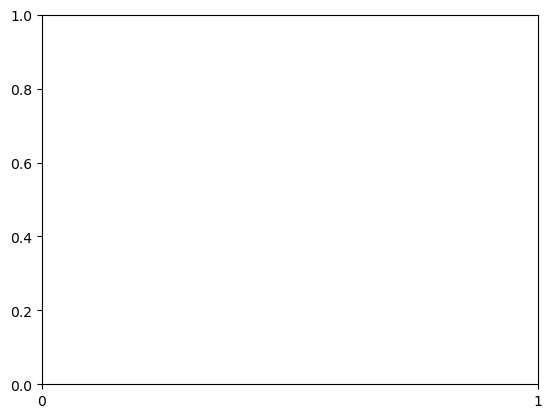

In [68]:
gender = gun_data.gender
age_group = gun_data.age_group
plt.figure(1)
x = range(2)
plt.xticks(x, gender)
plt.plot(x,age_group,"g")
plt.show()

In [49]:
gun_data

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,...,year,quarter,half,month_name,day_of_week,age_group,decade,name,current_age,description
0,Nashville religious school shooting,"Nashville, TN",2023-03-27,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28,Unclear,...,2023,1,1,March,Monday,Early Adulthood,2020's,Audrey Hale,28,who was a former student at the private Coven...
1,Michigan State University shooting,"East Lansing, Michigan",2023-02-13,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43,Unclear,...,2023,1,1,February,Monday,Middle Adulthood,2020's,Anthony D. McRae,43,opened fire at Berkey Hall and the MSU union
2,Half Moon Bay spree shooting,"Half Moon Bay, California",2023-01-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,Workplace,67,Unclear,...,2023,1,1,January,Monday,Old Age,2020's,Chunli Zhao,67,suspected of carrying out the attacks at a mu...
3,LA dance studio mass shooting,"Monterey Park, California",2023-01-21,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72,Yes,...,2023,1,1,January,Saturday,Old Age,2020's,Huu Can Tran,72,fled the scene in a white van and later shot ...
4,Virginia Walmart shooting,"Chesapeake, Virginia",2022-11-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31,Unclear,...,2022,4,2,November,Tuesday,Early Adulthood,2020's,Andre Bing,31,who worked as a supervisor at the store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Shopping centers spree killings,"Palm Bay, Florida",1987-04-23,"Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,...,1987,2,1,April,Thursday,Middle Adulthood,1980's,Retired librarian William Cruse,59,was paranoid neighbors gossiped that he was g...
137,United States Postal Service shooting,"Edmond, Oklahoma",1986-08-20,"Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,...,1986,3,2,August,Wednesday,Middle Adulthood,1980's,Postal worker Patrick Sherrill,44,opened fire at a post office before committin...
138,San Ysidro McDonald's massacre,"San Ysidro, California",1984-07-18,"James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,...,1984,3,2,July,Wednesday,Middle Adulthood,1980's,James Oliver Huberty,41,opened fire in a McDonald's restaurant before...
139,Dallas nightclub shooting,"Dallas, Texas",1984-06-29,"Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,...,1984,2,1,June,Friday,Early Adulthood,1980's,Abdelkrim Belachheb,39,opened fire at an upscale nightclub after a w...
